# 2.To use the scikit-learn digits dataset and an SVM to classify handwritten digits

# 1)Loading the dataset 

In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
digits = datasets.load_digits()

In [2]:
df = pd.DataFrame(data=digits['data'], columns = digits['feature_names'])
df['target'] = digits['target']

In [3]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


# 2)Visualizing the data 

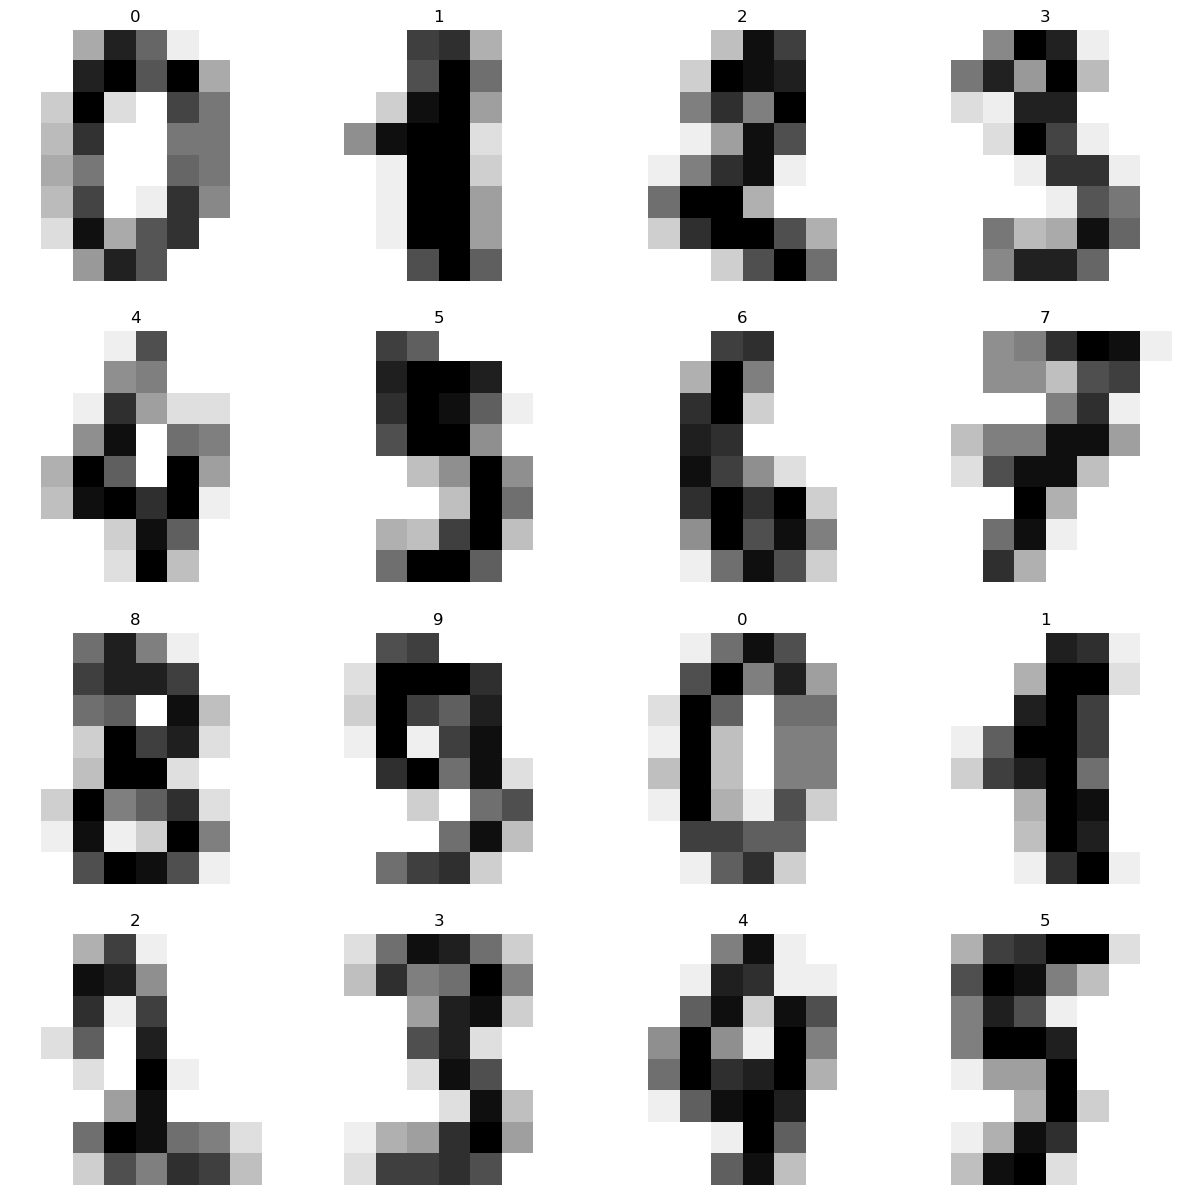

In [16]:
def plot_multi(i):
    nplots = 16
    fig = plt.figure(figsize=(15, 15))
    for j in range(nplots):
        plt.subplot(4, 4, j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    
    plt.show()
 
plot_multi(0)

# 3)Splitting the data into training and testing sets 

In [5]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1]
y=df.iloc[:,64]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [6]:
y_train

1085    6
224     8
1373    7
1613    1
321     6
       ..
555     9
1442    7
26      6
932     7
1384    4
Name: target, Length: 1437, dtype: int32

# 4)Initializing and training the SVM model 

In [7]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train, y_train)
pred=model.predict(x_test)

# 5)Testing the model 

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred))

[[40  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  1  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  0  0  0  0 38  0  0  0]
 [ 0  0  0  0  0  0  0 33  1  0]
 [ 0  0  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  2  0  0  0 35]]


In [9]:
import pandas as pd
import numpy as np

a = pred
b = y_test

df = pd.DataFrame({"prediction" : a, "exact" : b})
df=df.reset_index()
df

,index,prediction,exact
0,361,9,9
1,746,4,4
2,1404,5,5
3,1334,1,1
4,1088,7,7
...,...,...,...
355,835,3,3
356,887,4,4
357,658,2,2
358,738,9,9


In [10]:
counts=df.groupby(['prediction','exact']).size()
confusion = counts.unstack(level=-1, fill_value=0).sort_index(level=0, sort_remaining=False)
print("The confusion matrix is ")
confusion

The confusion matrix is 


exact,0,1,2,3,4,5,6,7,8,9
prediction,,,,,,,,,,
0,40,0,0,0,0,0,0,0,0,0
1,0,43,0,0,0,0,0,0,0,0
2,0,0,40,0,0,0,0,0,0,0
3,0,0,0,28,0,0,0,0,0,0
4,0,0,0,0,32,0,0,0,0,0
5,0,0,0,0,0,35,0,0,0,2
6,0,0,0,0,0,0,38,0,0,0
7,0,0,0,0,0,0,0,33,0,0
8,0,0,0,0,1,0,0,1,32,0


In [11]:
precision=np.zeros(10)
j=0
for i in range(len(confusion[0])):
    precision[j]=confusion[i][i]/sum(confusion.loc[i])
    print("The precision are ", precision[j])
    j+=1

The precision are  1.0
The precision are  1.0
The precision are  1.0
The precision are  1.0
The precision are  1.0
The precision are  0.9459459459459459
The precision are  1.0
The precision are  1.0
The precision are  0.9411764705882353
The precision are  1.0


In [12]:
recall=np.zeros(10)
j=0
for i in range(len(confusion[0])):
    recall[j]=confusion[i][i]/sum(confusion[:][i])
    print("The recall are ", recall[j])
    j+=1

The recall are  1.0
The recall are  1.0
The recall are  1.0
The recall are  1.0
The recall are  0.9696969696969697
The recall are  1.0
The recall are  1.0
The recall are  0.9705882352941176
The recall are  1.0
The recall are  0.9459459459459459


In [13]:
for i in range(len(precision)):
    f1_score=2*((precision[i]*recall[i])/(precision[i]+recall[i]))
    print("The f1_score is ",f1_score)

The f1_score is  1.0
The f1_score is  1.0
The f1_score is  1.0
The f1_score is  1.0
The f1_score is  0.9846153846153847
The f1_score is  0.9722222222222222
The f1_score is  1.0
The f1_score is  0.9850746268656716
The f1_score is  0.9696969696969697
The f1_score is  0.9722222222222222


In [14]:
Accuracy=(confusion.values.trace()/confusion.values.sum())
print("The accuracy of the model is ",Accuracy)

The accuracy of the model is  0.9888888888888889
